## Intro

* Plik z danymi - "olympics_homework.csv"
* Wykonaj zadania z tego notebooka

## Zadania

1. Wczytaj dane z pliku .csv
2. Stwórz nową df odrzucając ostatni wiersz z main_df - w dalszej pracy korzystaj z nowej df
3. Wykonaj histogram pokazujący jak rozkłada się ilość medali 
4. Wypisz dane państw, które zdobyły więcej złotych medali w igrzyskach zimowych niż w letnich
5. Wypisz dane państw, które zdobyły łącznie więcej niż 250 medali w igrzyskach letnich
6. Dodaj nową kolumnę 'Efficiency', która pokazuje wydajność państwa w zdobywaniu medali - tzn. stosunek całkowitej ilości zdobytych medali do ilości występów, a następnie posortuj df według tej kolumny malejąco
7. Wybierz losowo 5 państw i wykonaj barplot przedstawiający ilości zdobytych przez nie medali (osobno złotych, srebrnych, brązowych) na igrzyskach letnich

In [37]:
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

set_visualize_provider(InlineProvider())

In [3]:
main_df = pd.read_csv("data/olympics_homework.csv")

In [4]:
df = main_df.drop(main_df.index[-1])

In [10]:
df

,Country,NrSummerGames,SummerGold,SummerSilver,SummerBronze,SummerTotal,NrWinterGames,WinterGold,WinterSilver,WinterBronze,WinterTotal,NrTotalGames,TotalGold,TotalSilver,TotalBronze,CombinedTotal
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Yugoslavia (YUG) [YUG],16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
142,Independent Olympic Participants (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
143,Zambia (ZAM) [ZAM],12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
144,Zimbabwe (ZIM) [ZIM],12,3,4,1,8,1,0,0,0,0,13,3,4,1,8


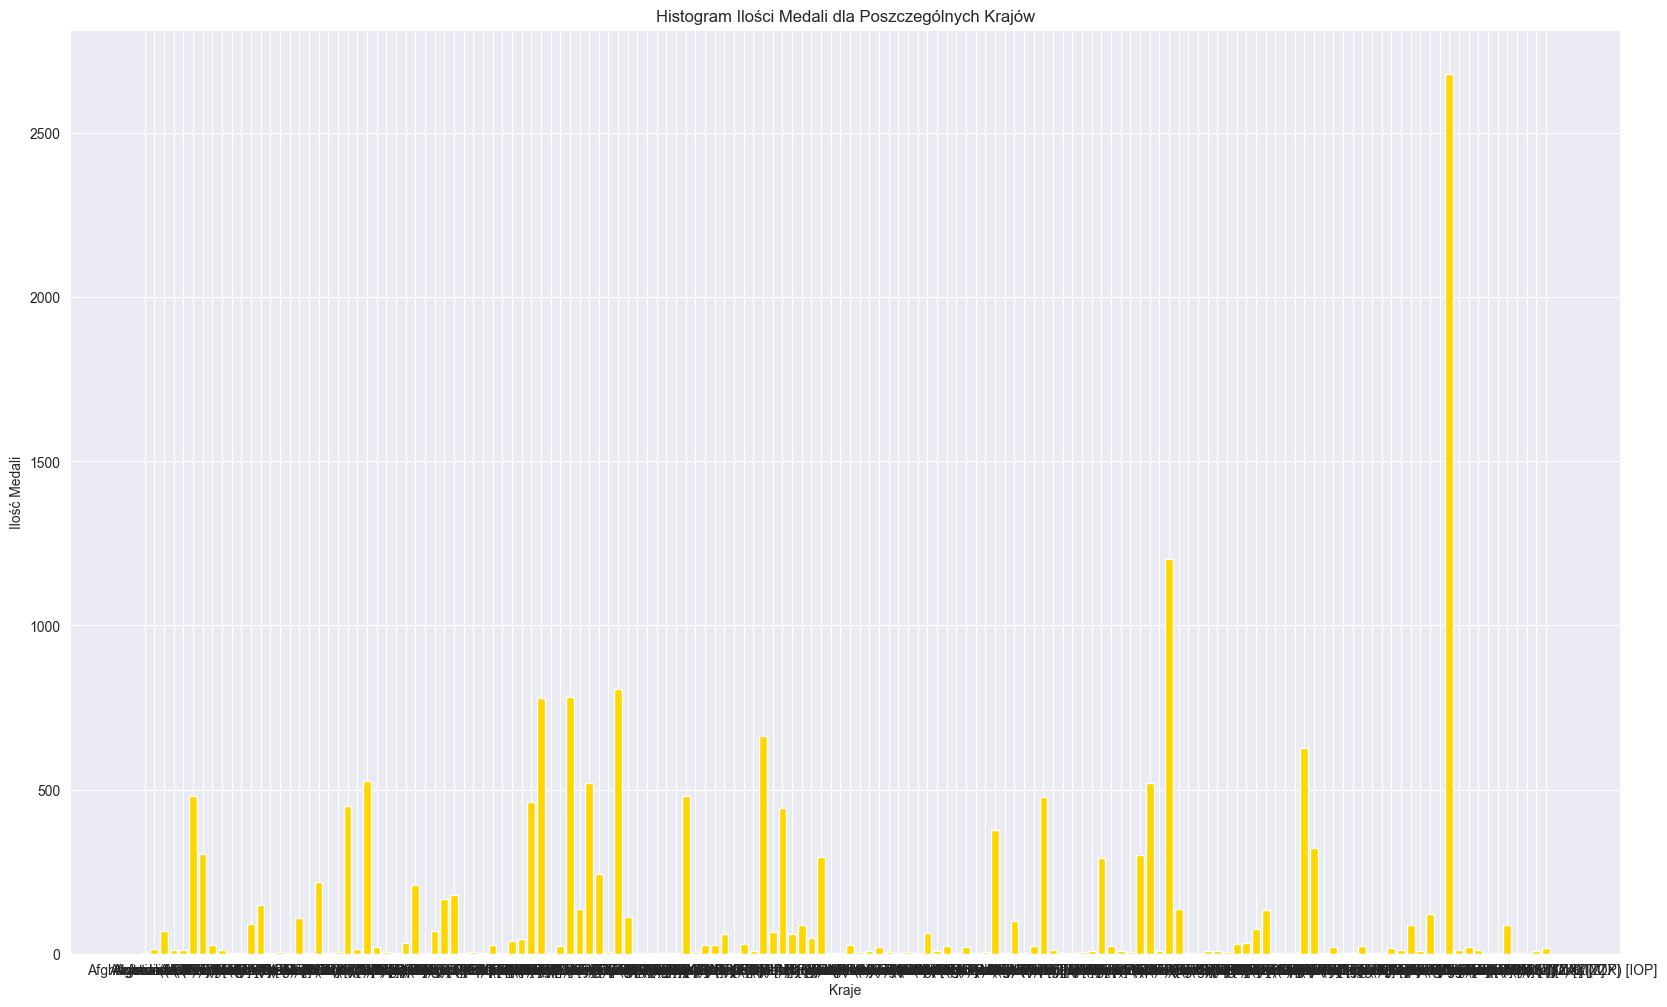

In [18]:
plt.figure(figsize=(20, 12))
plt.bar(df['Country'], df['CombinedTotal'], color='gold')
plt.xlabel('Kraje')
plt.ylabel('Ilość Medali')
plt.title('Histogram Ilości Medali dla Poszczególnych Krajów')
plt.show()

In [25]:
countries = df.loc[df['WinterTotal']>df['SummerTotal']]
print(countries)
#num_rows = df.shape[0]
#print(num_rows)

                Country  NrSummerGames  SummerGold  SummerSilver  \
6         Austria (AUT)             26          18            33   
75  Liechtenstein (LIE)             16           0             0   
93     Norway (NOR) [Q]             24          56            49   

    SummerBronze  SummerTotal  NrWinterGames  WinterGold  WinterSilver  \
6             35           86             22          59            78   
75             0            0             18           2             2   
93            43          148             22         118           111   

    WinterBronze  WinterTotal  NrTotalGames  TotalGold  TotalSilver  \
6             81          218            48         77          111   
75             5            9            34          2            2   
93           100          329            46        174          160   

    TotalBronze  CombinedTotal  
6           116            304  
75            5              9  
93          143            477  


In [27]:
countries = df.loc[df['SummerTotal']>250]
print(countries)

                                 Country  NrSummerGames  SummerGold  \
5              Australia (AUS) [AUS] [Z]             25         139   
21                          Canada (CAN)             25          59   
23                     China (CHN) [CHN]              9         201   
40                         Finland (FIN)             24         101   
41              France (FRA) [O] [P] [Z]             27         202   
44               Germany (GER) [GER] [Z]             15         174   
46              East Germany (GDR) [GDR]              5         153   
49         Great Britain (GBR) [GBR] [Z]             27         236   
56                         Hungary (HUN)             25         167   
64                   Italy (ITA) [M] [S]             26         198   
66                           Japan (JPN)             21         130   
88                 Netherlands (NED) [Z]             25          77   
99                          Poland (POL)             20          64   
103   

In [28]:
df['Efficiency']=df['CombinedTotal']/df['NrTotalGames']

In [31]:
df = df.sort_values(by = 'Efficiency', ascending = False)

In [32]:
print(df)

                                 Country  NrSummerGames  SummerGold  \
107             Unified Team (EUN) [EUN]              1          45   
106             Soviet Union (URS) [URS]              9         395   
135  United States (USA) [P] [Q] [R] [Z]             26         976   
104                   Russia (RUS) [RUS]              5         132   
46              East Germany (GDR) [GDR]              5         153   
..                                   ...            ...         ...   
53                    Guyana (GUY) [GUY]             16           0   
109                        Senegal (SEN)             13           0   
140                 Virgin Islands (ISV)             11           0   
29                          Cyprus (CYP)              9           0   
13                         Bermuda (BER)             17           0   

     SummerSilver  SummerBronze  SummerTotal  NrWinterGames  WinterGold  \
107            38            29          112              1           9 

In [40]:
selected_countries = random.sample(df['Country'].tolist(),5)

In [42]:
selected_countries

['Burundi\xa0(BDI)',
 'Iran\xa0(IRI) [K]',
 'Finland\xa0(FIN)',
 'Hungary\xa0(HUN)',
 'West Germany\xa0(FRG) [FRG]']

<Figure size 2000x1200 with 0 Axes>

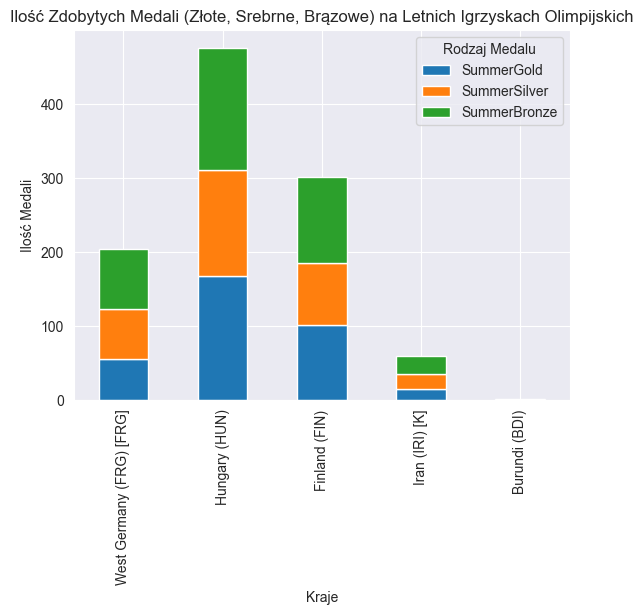

In [44]:
selected_df = df[df['Country'].isin(selected_countries)]

plt.figure(figsize=(20, 12))
selected_df.set_index('Country')[['SummerGold', 'SummerSilver', 'SummerBronze']].plot(kind='bar', stacked=True)
plt.xlabel('Kraje')
plt.ylabel('Ilość Medali')
plt.title('Ilość Zdobytych Medali (Złote, Srebrne, Brązowe) na Letnich Igrzyskach Olimpijskich')
plt.legend(title='Rodzaj Medalu')
plt.show()